# Fitbit Exploratory Analysis
This notebook explores Fitbit metrics as outcomes to some explanatory variable. Again, we explore all the different modalities, but always with some Fitbit metric as the target value - and in some cases as both the explanatory and target variables. 

The notebook is organized as follows:
1. [Data Import and Pre-Processing](#import)
2. [Processing](#process)
3. [Visualization and Analysis](#visualize)

<a id='import'></a>
# Data Import
The following cells import the various data to help with visualization and analysis

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

## Fitbit Data
Files from the ut1000 and ut2000 are read in individually and then merged together into one dataframe and tagged by their study name.

In [2]:
def combine_across_studies(dir_string='fitbit',file_string='dailySteps'):
    '''
    Imports data from ut1000 and ut2000 studies and combines into one dataframe.
    '''
    df = pd.DataFrame()
    for i in range(2):
        temp = pd.read_csv(f'../data/raw/ut{i+1}000/{dir_string}/{file_string}.csv')
        temp['study'] = f'ut{i+1}000'
        
        crossover = pd.read_csv(f'../data/raw/ut{i+1}000/admin/id_crossover.csv')
        if 'Id' in temp.columns:
            temp = pd.merge(left=temp,right=crossover,left_on='Id',right_on='record',how='left')
        elif 'pid' in temp.columns:
            temp = pd.merge(left=temp,right=crossover,left_on='pid',right_on='beiwe',how='left')
        else:
            continue
        
        df = pd.concat([df,temp])
        
    return df

### Steps
Steps can be used as a proxy for activity - up to a point. While it doesn't tell us how vigorous the activity was, we can at least see if the person had an active versus a "lazy" day.

In [3]:
steps = combine_across_studies('fitbit','dailySteps_merged')
steps['ActivityDay'] = pd.to_datetime(steps['ActivityDay'])
steps.set_index('ActivityDay',inplace=True)
# saving
steps.to_csv(f'/Users/hagenfritz/Projects/utx000/data/processed/ut3000-fitbit-dailysteps.csv')
steps.head()

,Id,StepTotal,study,record,beiwe,beacon
ActivityDay,,,,,,
2018-10-29,1025,3989,ut1000,1025,2qki3fim,NaN
2018-10-30,1025,7633,ut1000,1025,2qki3fim,NaN
2018-10-31,1025,5497,ut1000,1025,2qki3fim,NaN
2018-11-01,1025,8534,ut1000,1025,2qki3fim,NaN
2018-11-02,1025,6512,ut1000,1025,2qki3fim,NaN


### Sleep Summary
The sleep summary gives insight into how the participant slept each evening.

In [4]:
sleep_summary = combine_across_studies('fitbit','sleepStagesDay_merged')
sleep_summary = sleep_summary[sleep_summary['TotalMinutesLight'] > 0]
sleep_summary['TotalMinutesNREM'] = sleep_summary['TotalMinutesLight'] + sleep_summary['TotalMinutesDeep']
sleep_summary['REM:NREM'] = sleep_summary['TotalMinutesREM'] / sleep_summary['TotalMinutesNREM']
sleep_summary['SleepDay'] = pd.to_datetime(sleep_summary['SleepDay'])
sleep_summary.set_index('SleepDay',inplace=True)
# saving
sleep_summary.to_csv(f'/Users/hagenfritz/Projects/utx000/data/processed/ut3000-fitbit-sleepstagesummary.csv')
sleep_summary.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,study,record,beiwe,beacon,TotalMinutesNREM,REM:NREM
SleepDay,,,,,,,,,,,,,,
2018-10-30,1025,1,293,346,53,203,45,45,ut1000,1025,2qki3fim,NaN,248,0.181452
2018-10-31,1025,1,523,575,52,308,113,102,ut1000,1025,2qki3fim,NaN,421,0.242280
2018-11-01,1025,1,288,326,38,169,47,72,ut1000,1025,2qki3fim,NaN,216,0.333333
2018-11-02,1025,1,529,592,63,316,99,114,ut1000,1025,2qki3fim,NaN,415,0.274699
2018-11-03,1025,1,415,480,65,237,96,82,ut1000,1025,2qki3fim,NaN,333,0.246246


### Activity
the activity logs recorded by Fitbit give a perhaps more accurate depiction of the activity that participants underwent on each day.

In [5]:
act = combine_across_studies('fitbit','activitylogs_merged')
act['Date'] = pd.to_datetime(act['Date'])
act.set_index('Date',inplace=True)
# saving
act.to_csv(f'/Users/hagenfritz/Projects/utx000/data/processed/ut3000-fitbit-activity.csv')
act.head()

,Id,StartTime,Duration,Activity,ActivityType,LogType,Steps,Distance,ElevationGain,Calories,...,VeryActiveMinutes,AverageHeartRate,OutOfRangeHeartRateMinutes,FatBurnHeartRateMinutes,CardioHeartRateMinutes,PeakHeartRateMinutes,study,record,beiwe,beacon
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-30,1025,18:55:12,1075000,Walk,90013,auto_detected,1072,0.0,6.096,99,...,0,111,3,15,0,0,ut1000,1025,2qki3fim,NaN
2018-11-01,1025,18:45:50,1126000,Walk,90013,auto_detected,1534,0.0,3.048,117,...,7,112,1,17,1,0,ut1000,1025,2qki3fim,NaN
2018-11-05,1025,20:12:38,1127000,Walk,90013,auto_detected,1345,0.0,0.000,97,...,0,102,5,14,0,0,ut1000,1025,2qki3fim,NaN
2018-11-26,1041,15:04:17,6000,Run,90009,tracker,0,0.0,0.000,0,...,0,70,0,0,0,0,ut1000,1041,ygny19ey,NaN
2018-11-28,1041,13:38:30,26000,Bike,90001,tracker,0,0.0,0.000,0,...,0,62,0,0,0,0,ut1000,1041,ygny19ey,NaN


## Beiwe Mood Data
Mood data comes from surveys taken by the participants and has already been summarized nicely in csv files by Peter Wu for UT1000 and UT2000. Here we combine studies into one dataframe and then also reorganize those dataframes into one overall dataframe that gives a timestamp, mood scores, their beiwe ID, and the study the data are from.

In [6]:
def process_mood(mood='content'):
    '''
    Takes the mood string and returns a nicely formatted dataframe indexed by the date.
    '''
    df = combine_across_studies('beiwe',mood)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date',inplace=True)
    df.drop('Unnamed: 0',axis=1,inplace=True)
    df[mood] = df['answer']
    df.drop('answer',axis=1,inplace=True)
    
    return df

### Contentment

In [7]:
content = process_mood('content')
content.head()

,datetime,pid,study,record,beiwe,beacon,content
date,,,,,,,
2018-10-17,2018-10-17 14:15:51,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2
2018-10-19,2018-10-19 19:06:20,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2
2018-10-23,2018-10-23 13:01:16,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2
2018-10-24,2018-10-25 02:35:39,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2
2018-10-27,2018-10-27 23:29:35,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2


### Sadness

In [8]:
sad = process_mood('sad')
sad.head()

,datetime,pid,study,record,beiwe,beacon,sad
date,,,,,,,
2018-10-17,2018-10-17 14:15:51,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0
2018-10-19,2018-10-19 19:06:20,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0
2018-10-23,2018-10-23 13:01:16,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0
2018-10-24,2018-10-25 02:35:39,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0
2018-10-27,2018-10-27 23:29:35,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0


### Loneliness

In [9]:
lonely = process_mood('lonely')
lonely.head()

,datetime,pid,study,record,beiwe,beacon,lonely
date,,,,,,,
2018-10-17,2018-10-17 14:15:51,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,1
2018-10-19,2018-10-19 19:06:20,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,1
2018-10-23,2018-10-23 13:01:16,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0
2018-10-24,2018-10-25 02:35:39,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0
2018-10-27,2018-10-27 23:29:35,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0


### Stress

In [10]:
stress = process_mood('stress')
stress.head()

,datetime,pid,study,record,beiwe,beacon,stress
date,,,,,,,
2018-10-17,2018-10-17 14:15:51,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,1
2018-10-19,2018-10-19 19:06:20,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,1
2018-10-23,2018-10-23 13:01:16,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,1
2018-10-24,2018-10-25 02:35:39,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0
2018-10-27,2018-10-27 23:29:35,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,0


### Energy

In [11]:
energy = process_mood('energy')
energy.head()

,datetime,pid,study,record,beiwe,beacon,energy
date,,,,,,,
2018-10-17,2018-10-17 14:15:51,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2
2018-10-19,2018-10-19 19:06:20,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2
2018-10-23,2018-10-23 13:01:16,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2
2018-10-27,2018-10-27 23:29:35,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2
2018-10-28,2018-10-29 01:07:32,11i3mr4n,ut1000,1065.0,11i3mr4n,NaN,2


Now that the individual dataframes have been generated - and they have their uses - we combine them together into one overall dataframe.

In [12]:
mood_strs = ['content','sad','lonely','stress','energy']
moods = [content,sad,lonely,stress,energy]
mood = pd.DataFrame()
for bid in content['beiwe'].unique():
    frames = []
    for df,mood_str in zip(moods,mood_strs):
        df = df[df['beiwe'] == bid]
        mood_only = df[mood_str]
        frames.append(mood_only)
        
    if len(df) > 0:
        mood_comp = pd.concat(frames,axis=1,join='inner')
        mood_comp['beiwe'] = bid
        mood_comp['study'] = df['study'][0]
        mood = pd.concat([mood,mood_comp])
        
mood.head()

,content,sad,lonely,stress,energy,beiwe,study
date,,,,,,,
2018-10-17,2,0,1,1,2,11i3mr4n,ut1000
2018-10-19,2,0,1,1,2,11i3mr4n,ut1000
2018-10-23,2,0,0,1,2,11i3mr4n,ut1000
2018-10-27,2,0,0,0,2,11i3mr4n,ut1000
2018-10-28,2,0,0,0,2,11i3mr4n,ut1000


<a id='process'></a>
# Data Processing
The next cells further process or create new dataframes out of the data just imported

## Mood and Sleep
The following cells create a dataframe that allows us to look more deeply at the relationship between mood and sleep.

In [13]:
mood_and_sleep = pd.DataFrame()
for bid in sleep_summary['beiwe'].unique():
    sleepSummaryById = sleep_summary[sleep_summary['beiwe'] == bid]
    moodById = mood[mood['beiwe'] == bid].iloc[:,0:5]
    if len(moodById) > 0:
        merged = pd.merge(left=sleepSummaryById,left_index=True,right=moodById,right_index=True)

        mood_and_sleep = pd.concat([mood_and_sleep, merged])
        
moodAndSleepAvg = mood_and_sleep.groupby('record').mean()
moodAndSleepAvg

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,beacon,TotalMinutesNREM,REM:NREM,content,sad,lonely,stress,energy
record,,,,,,,,,,,,,,,,
1025,1025.0,1.000000,443.250000,504.250000,61.000000,263.750000,93.500000,86.000000,NaN,357.250000,0.234753,1.250000,1.250000,0.5,1.750000,0.500000
1254,1254.0,1.333333,409.500000,477.000000,66.000000,272.166667,70.666667,39.166667,NaN,342.833333,0.125516,2.333333,0.166667,0.0,1.333333,2.833333
1333,1333.0,1.000000,427.000000,485.000000,58.000000,238.000000,84.000000,105.000000,6.0,322.000000,0.326087,0.000000,2.000000,2.0,2.000000,2.000000
1459,1459.0,1.600000,364.000000,396.800000,29.600000,199.000000,37.000000,76.600000,NaN,236.000000,0.322374,0.800000,2.200000,2.0,3.000000,0.600000
2105,2105.0,1.125000,356.875000,402.375000,44.375000,208.500000,65.750000,66.875000,9.0,274.250000,0.244053,2.000000,0.000000,0.0,1.375000,1.750000
2159,2159.0,1.000000,301.250000,347.250000,46.000000,164.000000,61.250000,76.000000,NaN,225.250000,0.330971,1.250000,1.750000,1.5,2.000000,2.000000
2197,2197.0,1.500000,341.000000,368.000000,24.000000,170.000000,57.000000,44.500000,8.0,227.000000,0.194470,3.000000,0.000000,0.0,1.500000,2.000000
2318,2318.0,1.000000,462.333333,535.000000,72.666667,281.333333,68.000000,113.000000,NaN,349.333333,0.322399,3.000000,0.000000,0.0,0.000000,3.000000
2501,2501.0,1.142857,453.000000,543.571429,90.571429,301.571429,73.857143,77.571429,6.0,375.428571,0.203799,2.285714,0.142857,0.0,0.285714,2.000000


<a id='visualize'></a>
# Visualization and Analysis
For visualization, we look at a few relationships:
1. **Mood and Sleep**: To what extent does the participant's self-reported day-of mood affect their sleep?
2. **Steps and Sleep**: Do the number of steps a participant records alter their sleep?
3. **Activity and Sleep**: Do various measures of activity affect sleep?

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from scipy import stats

For many of the tests below, we use the same visualization technique with violin plots. The following function helps to generate these.

In [15]:
def plot_violins(data_df,tag,savefile='_no_filename_given_'):
    '''
    
    '''
    
    df = pd.DataFrame()
    statSummary = pd.DataFrame()
    for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','TotalMinutesREM','TotalMinutesNREM','REM:NREM']:
        temp = data_df
        temp['metric'] = sleepMetric
        temp['value'] = temp[sleepMetric]
        df = pd.concat([df,temp])

        high = data_df[data_df[tag] == True]
        low = data_df[data_df[tag] == False]

        a = high[sleepMetric].values
        b = low[sleepMetric].values
        stat, p = stats.ttest_ind(a,b)
        sig = False
        if p < 0.05:
            sig = True

        statsDf = pd.DataFrame(data={'step_count':[tag],'sleep_metric':[sleepMetric],
                                      'n_high':[len(high)],'n_low':[len(low)],
                                      'p':p,'significant':[sig]})
        statSummary = pd.concat([statSummary,statsDf])

    fig, ax = plt.subplots(1,3,figsize=(14,6),gridspec_kw={'width_ratios': [2, 2, 1]})
    df_minutes = df[df['metric'].isin(['TotalMinutesAsleep','TotalMinutesNREM'])]
    sns.violinplot(x='metric',y='value',hue=tag,split=True,hue_order=[True,False],palette=['white','firebrick'],cut=0,data=df_minutes,ax=ax[0])
    df_low = df[df['metric'].isin(['TotalTimeAwake','TotalMinutesREM'])]
    sns.violinplot(x='metric',y='value',hue=tag,split=True,hue_order=[True,False],palette=['white','firebrick'],cut=0,data=df_low,ax=ax[1])
    df_ratio = df[df['metric'] == 'REM:NREM']
    sns.violinplot(x='metric',y='value',hue=tag,split=True,hue_order=[True,False],palette=['white','firebrick'],cut=0,data=df_ratio,ax=ax[2])
    ax[0].set_ylabel('Minutes')
    ax[0].set_xlabel('')
    ax[0].set_ylim([0,900])
    ax[1].get_legend().remove()
    ax[1].set_ylabel('Minutes')
    ax[1].set_xlabel('')
    ax[1].set_ylim([0,250])
    ax[2].get_legend().remove()
    ax[2].set_ylabel('Ratio')
    ax[2].set_xlabel('')
    ax[2].set_ylim([0,0.8])
    
    print(statSummary)

    plt.subplots_adjust(wspace=0.22)
    if savefile != '_no_filename_given_':
        plt.savefig(savefile)
    
    plt.show()
    plt.close()

## Mood and Sleep
Does mood predict a certain sleep outcome? Here we exhaustively look at the various moods and whether or not they predict a certain sleep metric.

First we generate a new dataframe that has high and low tags for the mood scores where (0,1) are low and (2,3) are high.

In [16]:
moodAndSleep = pd.DataFrame()
# moods (excluding energy for now)
for mood in ['content','sad','stress','lonely']:
    # essentially copying the original sleep_and_mood four times and adding new score/mood columns
    temp = mood_and_sleep
    temp['Score'] = np.where(mood_and_sleep[mood] > 1, 'High','Low')
    temp['mood'] = mood
    moodAndSleep = pd.concat([moodAndSleep,temp])
    
moodAndSleepAvgLong = pd.DataFrame()
# moods (excluding energy for now)
for mood in ['content','sad','stress','lonely']:
    # essentially copying the original sleep_and_mood four times and adding new score/mood columns
    temp = moodAndSleepAvg
    temp['Score'] = np.where(moodAndSleepAvg[mood] > 1, 'High','Low')
    temp['mood'] = mood
    moodAndSleepAvgLong = pd.concat([moodAndSleepAvgLong,temp])


Now we used those tags to generate visuals for each mood and run a t-test to see if the distributions are significantlt different. We have to do soem "silly" reorganizing, but it works.

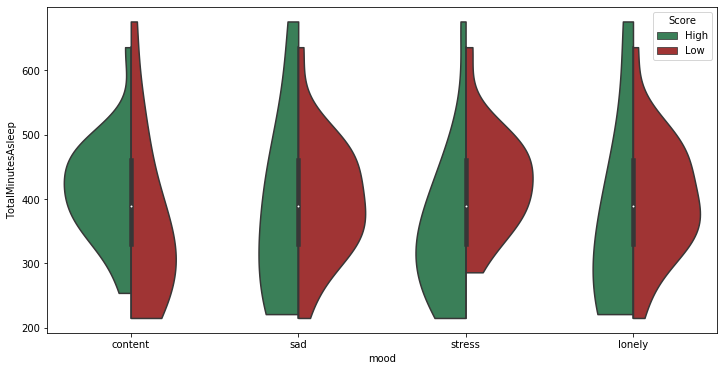

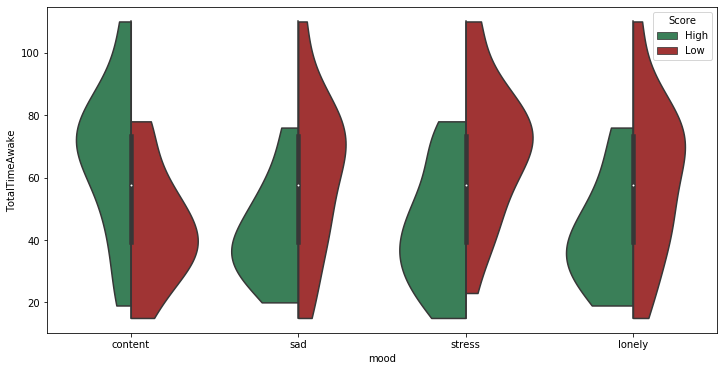

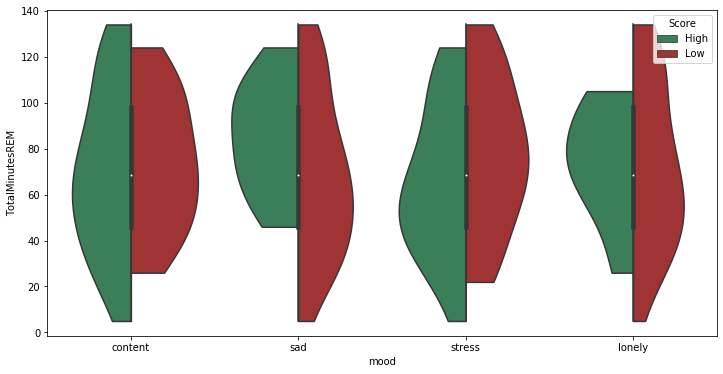

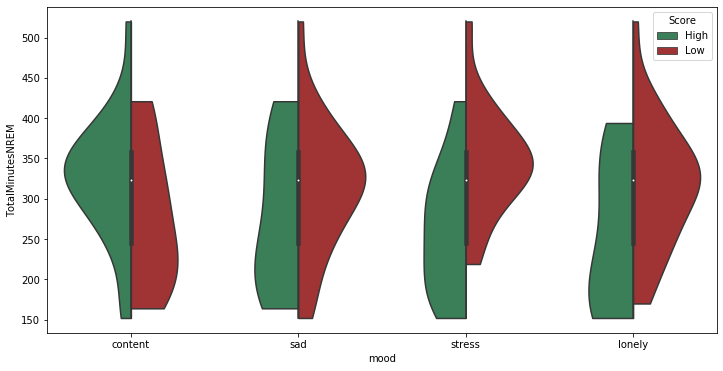

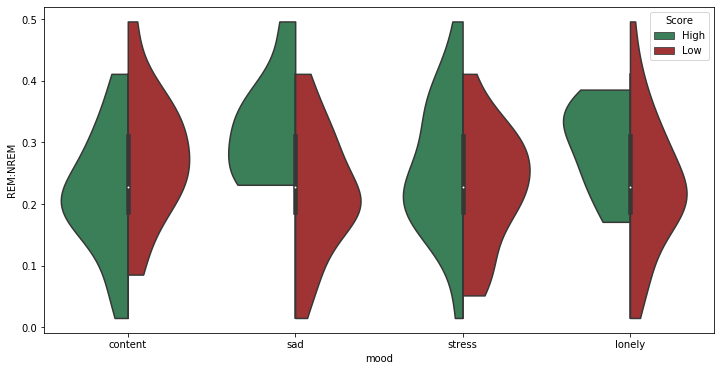

In [17]:
statSummary = pd.DataFrame()
for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','TotalMinutesREM','TotalMinutesNREM','REM:NREM']:
    fig, ax = plt.subplots(figsize=(12,6))
    sns.violinplot(x='mood',y=sleepMetric,hue='Score',split=True,cut=0,palette=['seagreen','firebrick'],data=moodAndSleep,ax=ax)

    plt.show()
    plt.close()
    
    for mood in moodAndSleep['mood'].unique():
        temp = moodAndSleep[moodAndSleep['mood'] == mood]
        high = temp[temp['Score'] == 'High']
        low = temp[temp['Score'] == 'Low']

        a = high[sleepMetric].values
        b = low[sleepMetric].values
        stat, p = stats.ttest_ind(a,b)
        sig = False
        if p < 0.05:
            sig = True

        statsDf = pd.DataFrame(data={'mood':[mood],'sleep_metric':[sleepMetric],
                                      'n_high':[len(high)],'n_low':[len(low)],
                                      'p':p,'significant':[sig]})
        statSummary = pd.concat([statSummary,statsDf])

In [18]:
statSummary

,mood,sleep_metric,n_high,n_low,p,significant
0,content,TotalMinutesAsleep,24,16,0.108704,False
0,sad,TotalMinutesAsleep,9,31,0.685407,False
0,stress,TotalMinutesAsleep,19,21,0.019539,True
0,lonely,TotalMinutesAsleep,7,33,0.401212,False
0,content,TotalTimeAwake,24,16,0.004696,True
0,sad,TotalTimeAwake,9,31,0.039502,True
0,stress,TotalTimeAwake,19,21,0.000493,True
0,lonely,TotalTimeAwake,7,33,0.079387,False
0,content,TotalMinutesREM,24,16,0.752305,False
0,sad,TotalMinutesREM,9,31,0.196245,False


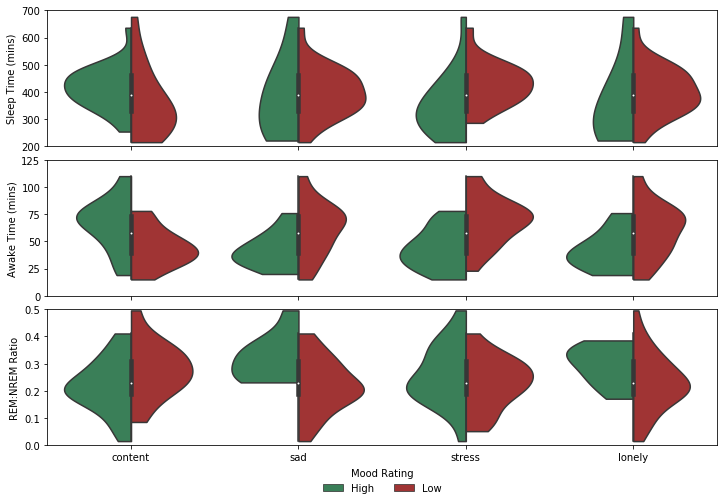

In [19]:
statSummary = pd.DataFrame()
fig, ax = plt.subplots(3,1,figsize=(12,8),sharex=True)
#for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','TotalMinutesREM','TotalMinutesNREM','REM:NREM']:
sns.violinplot(x='mood',y='TotalMinutesAsleep',hue='Score',split=True,cut=0,palette=['seagreen','firebrick'],data=moodAndSleep,ax=ax[0])
sns.violinplot(x='mood',y='TotalTimeAwake',hue='Score',split=True,cut=0,palette=['seagreen','firebrick'],data=moodAndSleep,ax=ax[1])
sns.violinplot(x='mood',y='REM:NREM',hue='Score',split=True,cut=0,palette=['seagreen','firebrick'],data=moodAndSleep,ax=ax[2])

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(title='Mood Rating',loc='upper center',bbox_to_anchor=(0.5,-0.1),frameon=False,ncol=2)
for i in range(3):
    ax[i].set_xlabel('')
    
ax[0].set_ylim([200,700])
ax[0].set_ylabel('Sleep Time (mins)')
ax[1].set_ylim([0,125])
ax[1].set_ylabel('Awake Time (mins)')
ax[2].set_ylim([0,0.5])
ax[2].set_ylabel('REM:NREM Ratio')

plt.subplots_adjust(hspace=0.1)
plt.show()
plt.close()

## Number of Steps and Sleep
Using steps as a proxy for activity, perhaps we can see if the number of steps taken during the day affects sleep in some way.

In [20]:
stepsAndSleep = pd.DataFrame()
for bid in sleep_summary['beiwe'].unique():
    sleepById = sleep_summary[sleep_summary['beiwe'] == bid]
    stepsById = steps[steps['beiwe'] == bid]
    df = pd.merge(left=sleepById, left_index=True, right=stepsById['StepTotal'], right_index=True, how='inner')
    
    stepsAndSleep = pd.concat([stepsAndSleep,df])
    
stepsAndSleep['>1000 Steps?'] = np.where(stepsAndSleep['StepTotal'] > 10000, True, False)
stepsAndSleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,study,record,beiwe,beacon,TotalMinutesNREM,REM:NREM,StepTotal,>1000 Steps?
2018-10-30,1025,1,293,346,53,203,45,45,ut1000,1025,2qki3fim,NaN,248,0.181452,7633,False
2018-10-31,1025,1,523,575,52,308,113,102,ut1000,1025,2qki3fim,NaN,421,0.242280,5497,False
2018-11-01,1025,1,288,326,38,169,47,72,ut1000,1025,2qki3fim,NaN,216,0.333333,8534,False
2018-11-02,1025,1,529,592,63,316,99,114,ut1000,1025,2qki3fim,NaN,415,0.274699,6512,False
2018-11-03,1025,1,415,480,65,237,96,82,ut1000,1025,2qki3fim,NaN,333,0.246246,6431,False


### Scatter
We start by seeing if there is any clear indication of a relationship with scatter plots.

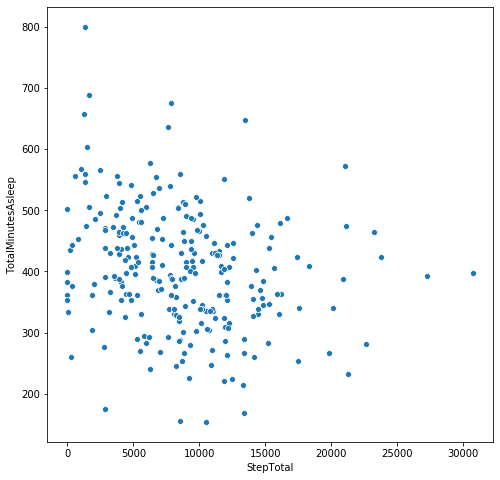

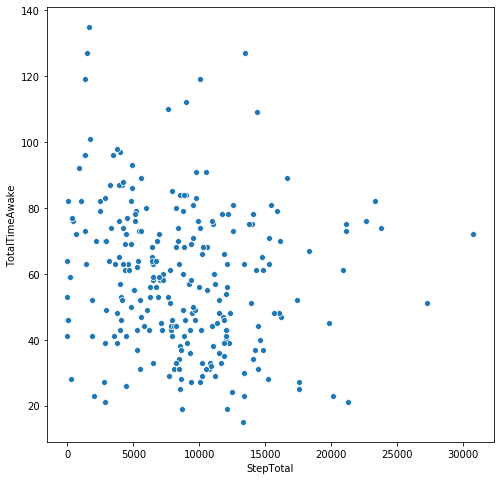

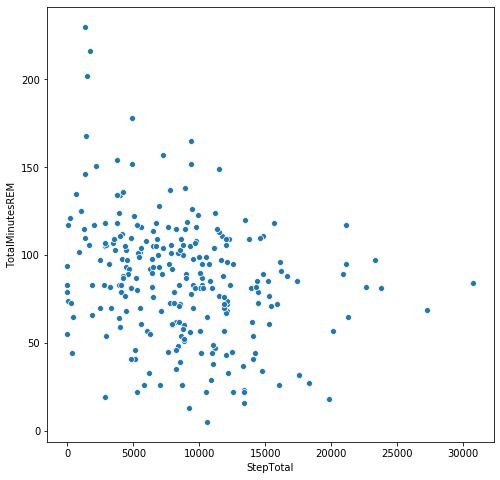

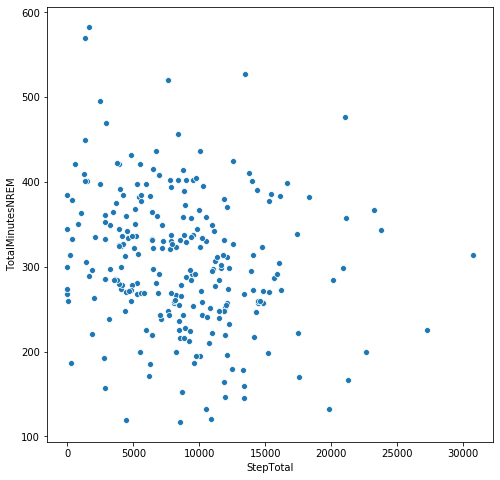

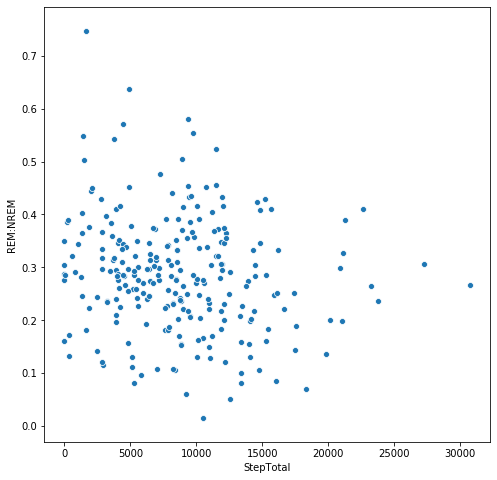

In [21]:
for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','TotalMinutesREM','TotalMinutesNREM','REM:NREM']:
    fig,ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(stepsAndSleep['StepTotal'],stepsAndSleep[sleepMetric])

### Distributions
Now we see if for days with high step counts (>1000) there is some difference in the sleep metric distributions versus days with low step counts.

     step_count        sleep_metric  n_high  n_low         p  significant
0  >1000 Steps?  TotalMinutesAsleep      91    161  0.000044         True
0  >1000 Steps?      TotalTimeAwake      91    161  0.006199         True
0  >1000 Steps?     TotalMinutesREM      91    161  0.000005         True
0  >1000 Steps?    TotalMinutesNREM      91    161  0.001975         True
0  >1000 Steps?            REM:NREM      91    161  0.010202         True


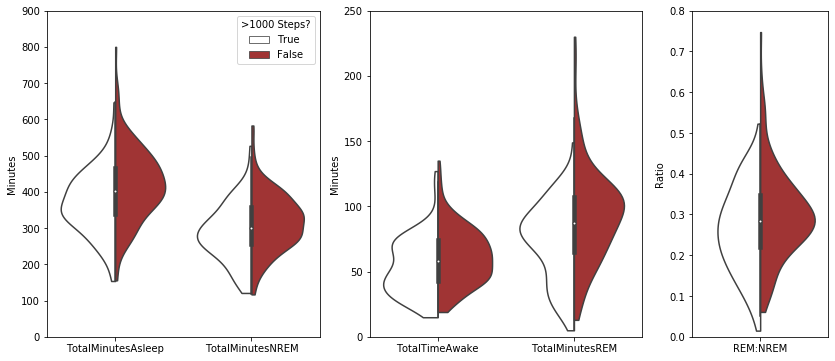

In [22]:
plot_violins(stepsAndSleep,'>1000 Steps?','/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut3000-fitbit-fitbit-steps-sleep-violin.png')


## Activity and Sleep
Now we look at the activity logs explictly to see how sleep is effected.

In [23]:
actAndSleep = pd.DataFrame()
for bid in sleep_summary['beiwe'].unique():
    sleepById = sleep_summary[sleep_summary['beiwe'] == bid]
    actById = act[act['beiwe'] == bid]
    if len(actById) > 0:
        df = pd.merge(left=sleepById, left_index=True, right=actById[['StartTime','Duration','Activity','Steps','Calories','AverageHeartRate']], right_index=True, how='left', indicator='Exercise?')
        df['Exercise?'] = np.where(df['Exercise?'] == 'left_only',False,True)
        actAndSleep = pd.concat([actAndSleep,df])

actAndSleep.fillna(0,inplace=True)
actAndSleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,study,record,...,beacon,TotalMinutesNREM,REM:NREM,StartTime,Duration,Activity,Steps,Calories,AverageHeartRate,Exercise?
2018-10-30,1025,1,293,346,53,203,45,45,ut1000,1025,...,0.0,248,0.181452,18:55:12,1075000.0,Walk,1072.0,99.0,111.0,True
2018-10-31,1025,1,523,575,52,308,113,102,ut1000,1025,...,0.0,421,0.242280,0,0.0,0,0.0,0.0,0.0,False
2018-11-01,1025,1,288,326,38,169,47,72,ut1000,1025,...,0.0,216,0.333333,18:45:50,1126000.0,Walk,1534.0,117.0,112.0,True
2018-11-02,1025,1,529,592,63,316,99,114,ut1000,1025,...,0.0,415,0.274699,0,0.0,0,0.0,0.0,0.0,False
2018-11-03,1025,1,415,480,65,237,96,82,ut1000,1025,...,0.0,333,0.246246,0,0.0,0,0.0,0.0,0.0,False


  step_count        sleep_metric  n_high  n_low         p  significant
0  Exercise?  TotalMinutesAsleep     198    270  0.001499         True
0  Exercise?      TotalTimeAwake     198    270  0.037429         True
0  Exercise?     TotalMinutesREM     198    270  0.000520         True
0  Exercise?    TotalMinutesNREM     198    270  0.001544         True
0  Exercise?            REM:NREM     198    270  0.356045        False


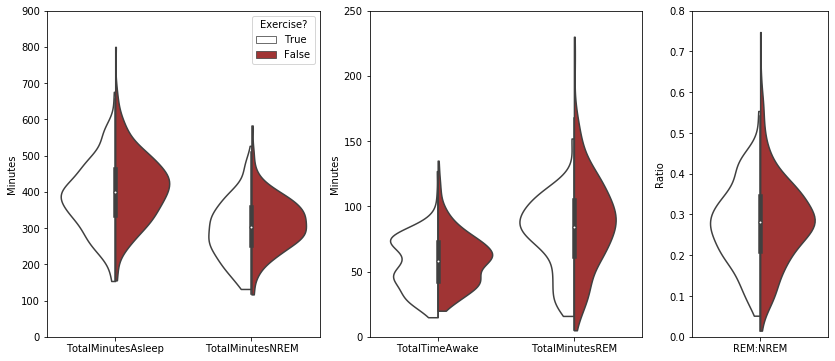

In [24]:
plot_violins(actAndSleep,'Exercise?','/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut3000-fitbit-fitbit-activity-sleep-violin.png')


## Differences in Activity and Sleep
Now we look at the individuals who recorded activity and see if there are any differences within this subgroup.

In [25]:
exerciseAndSleep = actAndSleep[actAndSleep['Exercise?'] == True]
try:
    exerciseAndSleep.drop(['metric','value'],axis=1,inplace=True)
except:
    print('no columns in df')
    
exerciseAndSleep.columns

/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Id', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'TotalTimeAwake', 'TotalMinutesLight', 'TotalMinutesDeep',
       'TotalMinutesREM', 'study', 'record', 'beiwe', 'beacon',
       'TotalMinutesNREM', 'REM:NREM', 'StartTime', 'Duration', 'Activity',
       'Steps', 'Calories', 'AverageHeartRate', 'Exercise?'],
      dtype='object')

### Scatter
Since we don't have a good way to separate the sleep metric distributions into high and low activity regions, we will look at scatter plots. The main idea is to see if the duration or intensity of the workout (measured by average heart rate) has an effect on the participants who are active. 

#### Activity Considerations
It might be interesting/enlightening to include a third variable - activity type - on the scatter plots. Points will be colored according to the activity. 

In [26]:
# removing unique activities like badminton or others that are recorded only once
normalExerciseAndSleep = exerciseAndSleep # calling these "normal" activities
for sport in normalExerciseAndSleep['Activity'].unique():
    # Checking the number of activities recorded under specific tags
    temp = normalExerciseAndSleep[normalExerciseAndSleep['Activity'] == sport]
    n = len(temp)
    print(f'Sport: {sport} - Number of activites: {n}')
    # removing activities only tagged once
    if n < 2:
        normalExerciseAndSleep = normalExerciseAndSleep[normalExerciseAndSleep['Activity'] != sport]

Sport: Walk - Number of activites: 151
Sport: Bike - Number of activites: 1
Sport: Sport - Number of activites: 12
Sport: Run - Number of activites: 12
Sport: Weights - Number of activites: 2
Sport: Treadmill - Number of activites: 1
Sport: Workout - Number of activites: 4
Sport: Elliptical - Number of activites: 5
Sport: Badminton - Number of activites: 1
Sport: Pilates - Number of activites: 1
Sport: Outdoor Bike - Number of activites: 7
Sport: Aerobic Workout - Number of activites: 1


Now we look at the "normal" activities to see if the duration or average heart rate during the exercise has an effect on the sleep quality metrics.

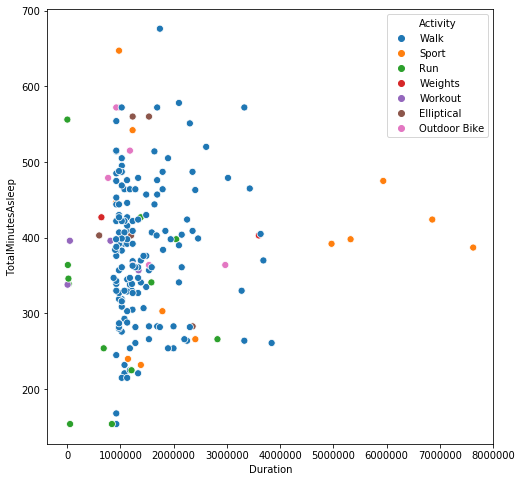

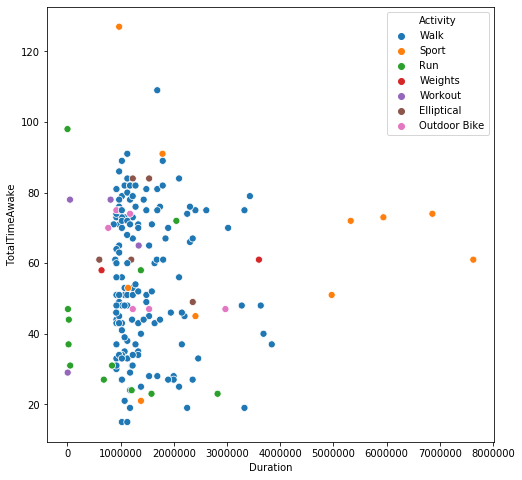

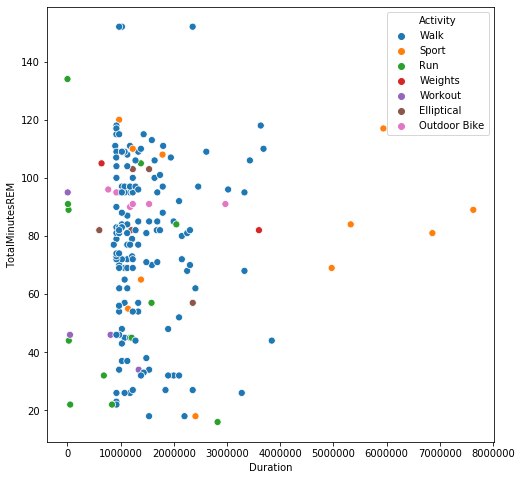

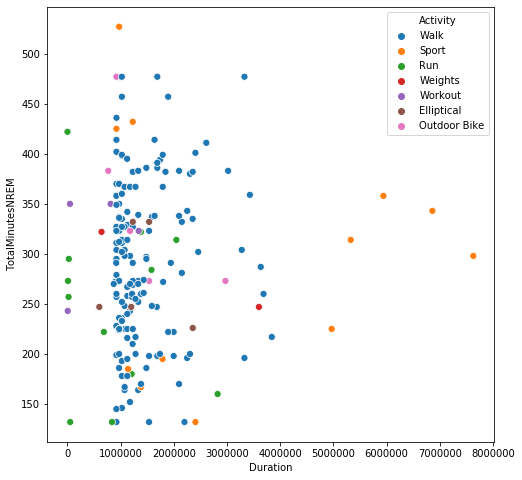

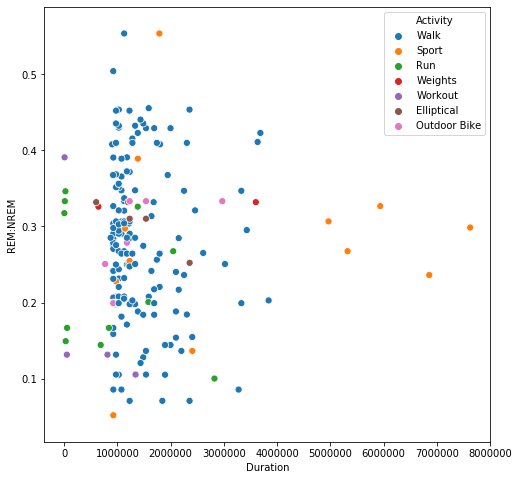

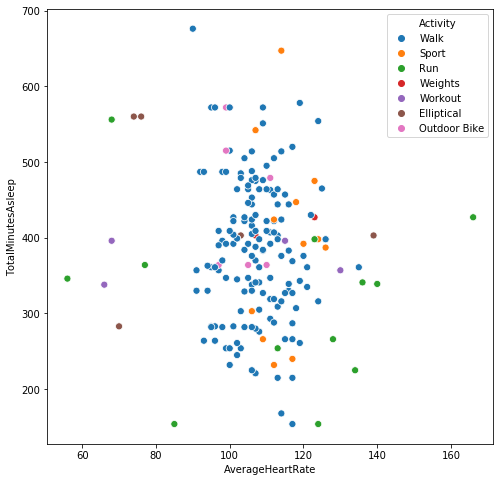

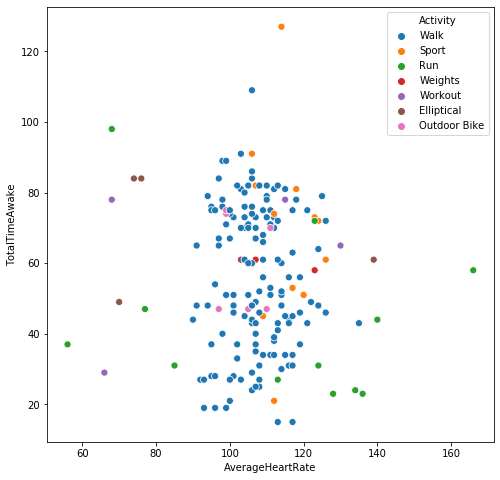

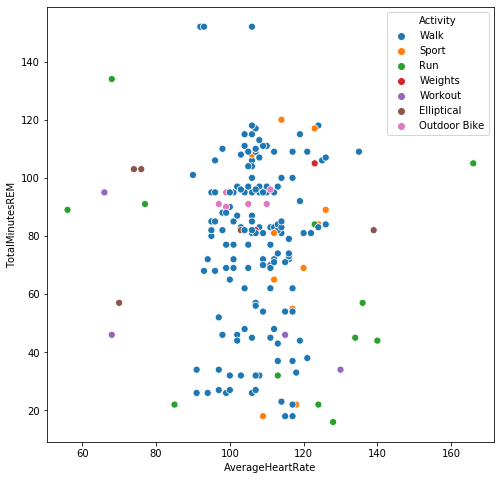

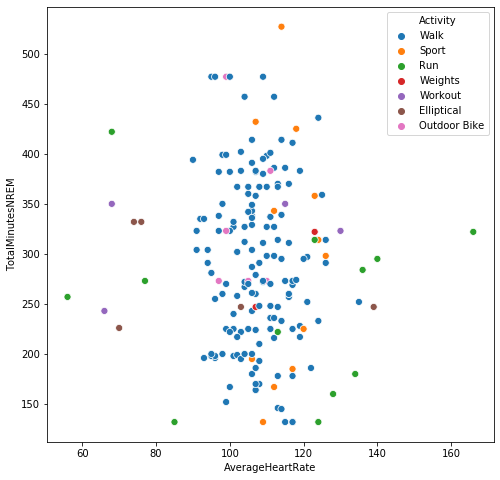

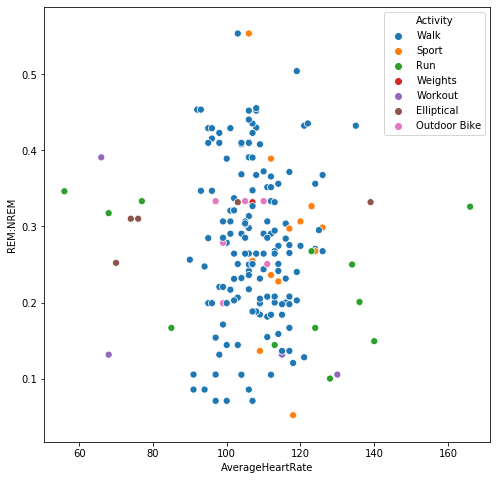

In [27]:
for activityMetric in ['Duration','AverageHeartRate']:
    for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','TotalMinutesREM','TotalMinutesNREM','REM:NREM']:
        fig,ax=plt.subplots(figsize=(8,8))
        sns.scatterplot(x=activityMetric,y=sleepMetric,hue='Activity',s=50,data=normalExerciseAndSleep,ax=ax)
    plt.show()
    plt.close()

The walking activity seems to be weighing the results far more heavily than the other activities and is really not the type of activity we are looking for. So now we perform the same analysis as above, but remove only the "Walk" activities. 

In [28]:
noWalking = exerciseAndSleep[exerciseAndSleep['Activity'] != 'Walk']

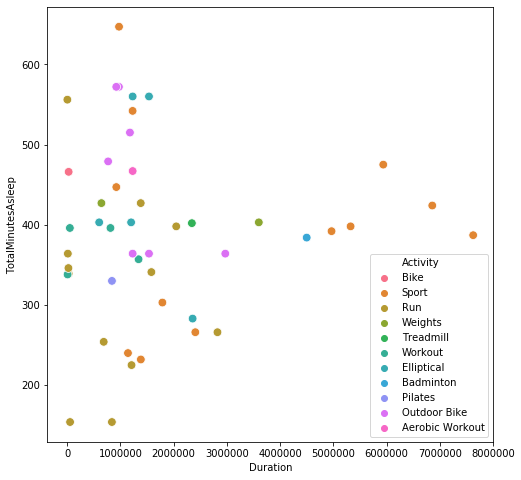

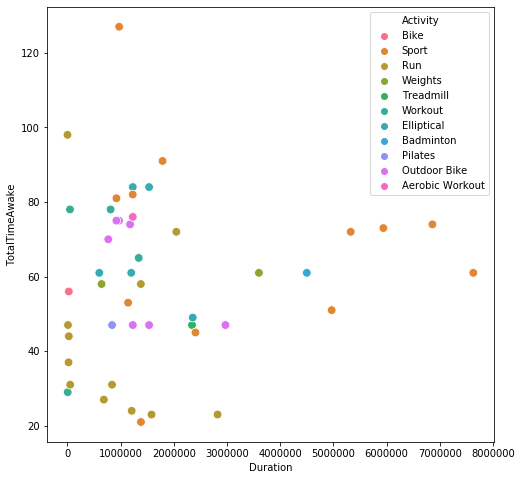

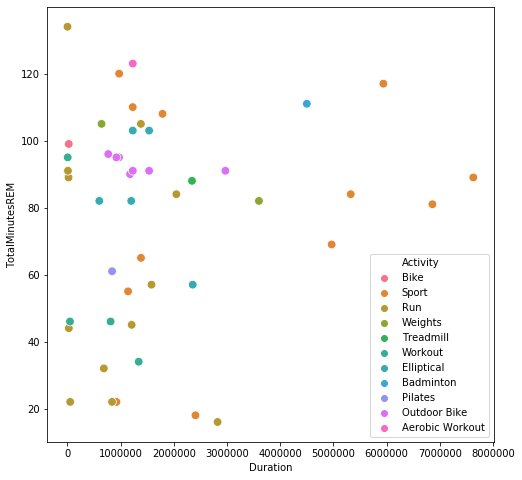

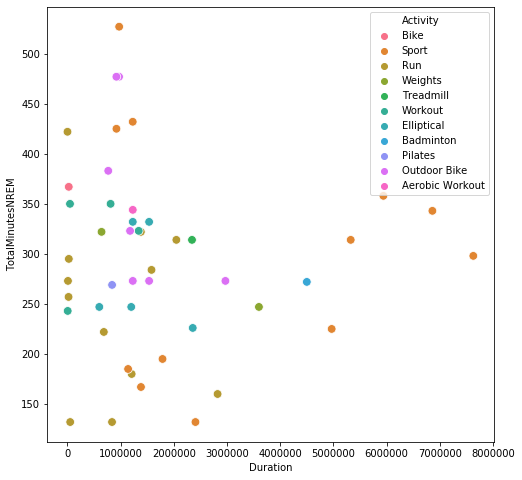

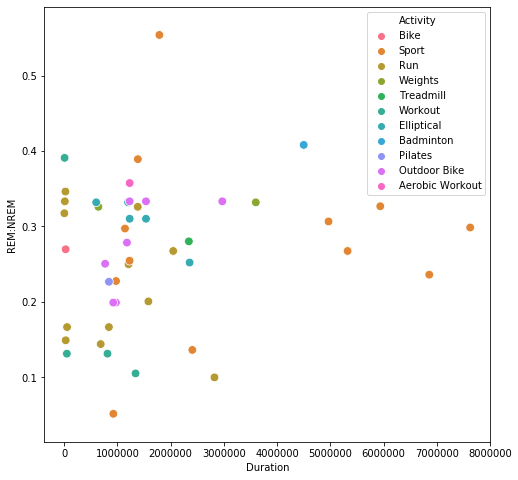

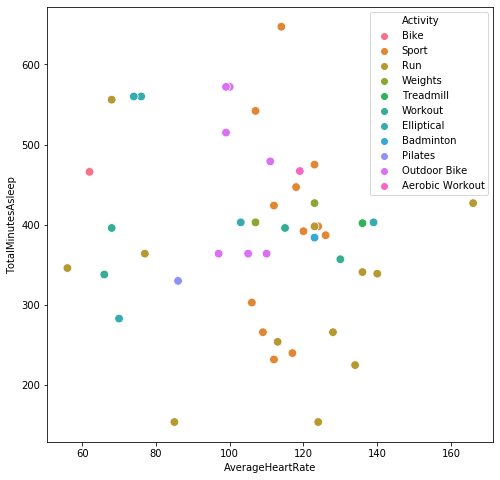

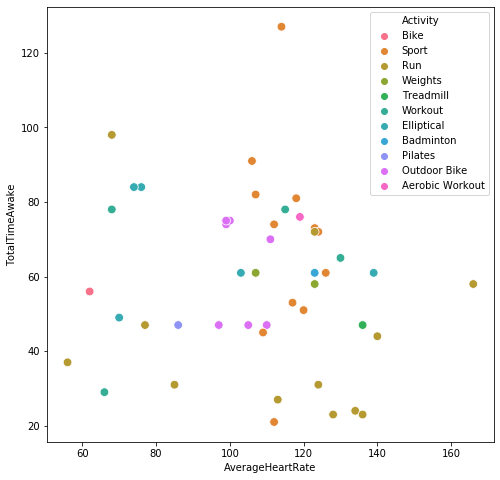

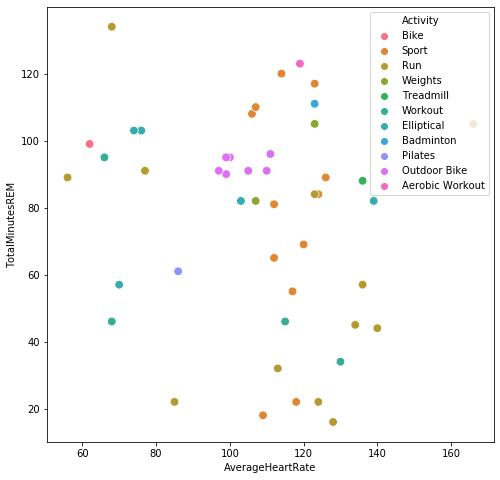

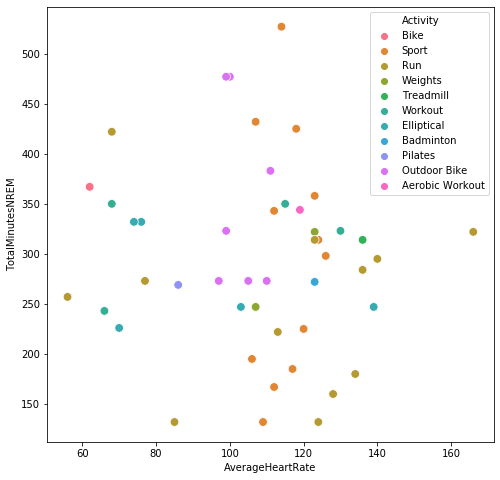

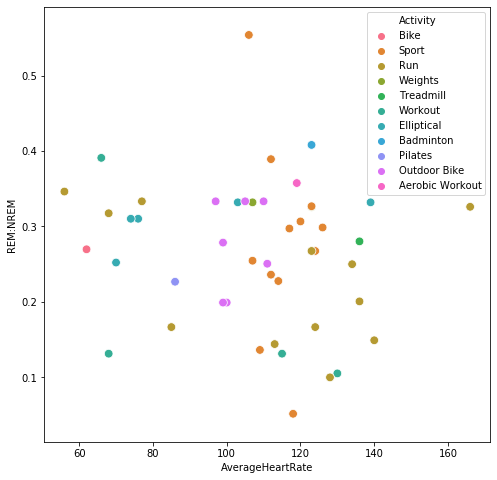

In [29]:
for activityMetric in ['Duration','AverageHeartRate']:
    for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','TotalMinutesREM','TotalMinutesNREM','REM:NREM']:
        fig,ax=plt.subplots(figsize=(8,8))
        sns.scatterplot(x=activityMetric,y=sleepMetric,hue='Activity',s=75,data=noWalking,ax=ax)
    plt.show()
    plt.close()

#### 60 Minutes a Day
Do 60 minutes of activity (recommended...by someone) relate to sleep quality improvements?

/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

  step_count        sleep_metric  n_high  n_low         p  significant
0   60 mins?  TotalMinutesAsleep      39      8  0.556896        False
0   60 mins?      TotalTimeAwake      39      8  0.366211        False
0   60 mins?     TotalMinutesREM      39      8  0.995820        False
0   60 mins?    TotalMinutesNREM      39      8  0.934149        False
0   60 mins?            REM:NREM      39      8  0.907409        False


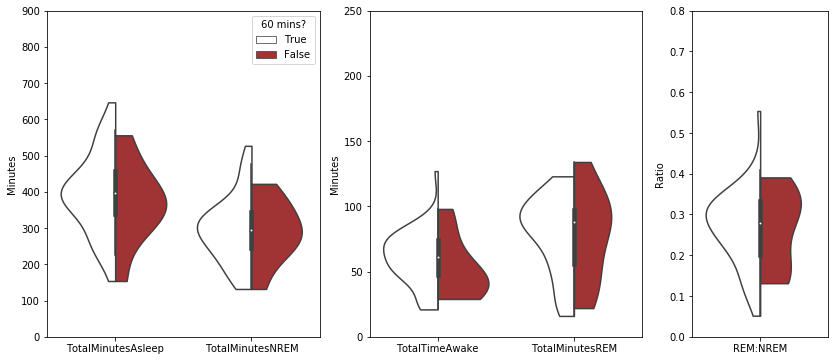

In [30]:
noWalking['Duration_Minues'] = noWalking['Duration']/100/60
noWalking['60 mins?'] = np.where(noWalking['Duration_Minues'] > 60, True, False)
plot_violins(noWalking,'60 mins?','/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut3000-fitbit-fitbit-60mins-sleep-violin.png')


#### Start Time Considerations
I remember reading somewhere on Fitbit's website that evening activities are actually prohibitive to sleep since as you exercise, you release chemicals (can't remember the names) that wake up up. Here we define evening activities as those that start at 17:00 or later. Since we are now defining a categorical variable, we can divide the sleep metrics into two categories based on the time of the activity.

In [31]:
# Getting the hour and tagging evening activities
hours = []
for i in range(len(exerciseAndSleep)):
    hours.append(pd.to_datetime(exerciseAndSleep['StartTime'][i]).hour)

exerciseAndSleep['StartHour'] = hours
exerciseAndSleep['Evening Activity?'] = np.where(exerciseAndSleep['StartHour'] > 17, True, False)
exerciseAndSleep.head()

/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,study,record,...,REM:NREM,StartTime,Duration,Activity,Steps,Calories,AverageHeartRate,Exercise?,StartHour,Evening Activity?
2018-10-30,1025,1,293,346,53,203,45,45,ut1000,1025,...,0.181452,18:55:12,1075000.0,Walk,1072.0,99.0,111.0,True,18,True
2018-11-01,1025,1,288,326,38,169,47,72,ut1000,1025,...,0.333333,18:45:50,1126000.0,Walk,1534.0,117.0,112.0,True,18,True
2018-11-05,1025,1,345,378,33,210,48,87,ut1000,1025,...,0.337209,20:12:38,1127000.0,Walk,1345.0,97.0,102.0,True,20,True
2018-11-28,1041,1,466,522,56,262,105,99,ut1000,1041,...,0.269755,13:38:30,26000.0,Bike,0.0,0.0,62.0,True,13,False
2018-11-28,1126,1,514,574,60,319,95,100,ut1000,1126,...,0.241546,11:48:22,1638000.0,Walk,2690.0,143.0,114.0,True,11,False


/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


          step_count        sleep_metric  n_high  n_low         p  significant
0  Evening Activity?  TotalMinutesAsleep      74    124  0.430143        False
0  Evening Activity?      TotalTimeAwake      74    124  0.078967        False
0  Evening Activity?     TotalMinutesREM      74    124  0.235170        False
0  Evening Activity?    TotalMinutesNREM      74    124  0.862056        False
0  Evening Activity?            REM:NREM      74    124  0.306079        False


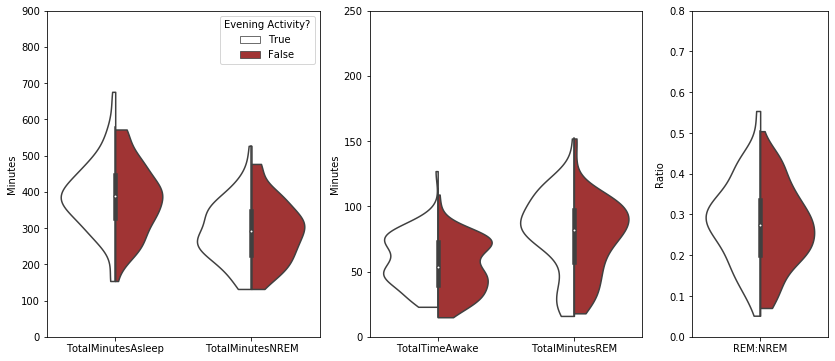

In [32]:
plot_violins(exerciseAndSleep,'Evening Activity?','/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut3000-fitbit-fitbit-acttime-sleep-violin.png')


## Combined Violin Plot
After some feedback from Cameron C. and Peter W., the figure below is generated as a holistic view of the participant.

### Mood and Sleep Data

In [33]:
moodAndSleep.to_csv(f'../data/processed/ut3000-beiwe-fitbit-mood-sleep.csv')
moodAndSleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,study,record,...,beacon,TotalMinutesNREM,REM:NREM,content,sad,lonely,stress,energy,Score,mood
2018-10-30,1025,1,293,346,53,203,45,45,ut1000,1025,...,NaN,248,0.181452,2,0,0,3,0,High,content
2018-10-31,1025,1,523,575,52,308,113,102,ut1000,1025,...,NaN,421,0.242280,1,3,0,3,1,Low,content
2018-11-02,1025,1,529,592,63,316,99,114,ut1000,1025,...,NaN,415,0.274699,1,0,0,0,0,Low,content
2018-11-04,1025,1,428,504,76,228,117,83,ut1000,1025,...,NaN,345,0.240580,1,2,2,1,1,Low,content
2018-10-27,1254,2,498,567,62,276,91,32,ut1000,1254,...,NaN,367,0.087193,3,0,0,1,3,High,content


### Getting Energy Data

In [34]:
energyOnly = mood_and_sleep
energyOnly['Score'] = np.where(energyOnly['energy'] < 3, 'Low','High')
energyOnly['mood'] = 'energy'
energyOnly.to_csv(f'../data/processed/ut3000-beiwe-fitbit-energy-sleep.csv')
energyOnly.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,study,record,...,beacon,TotalMinutesNREM,REM:NREM,content,sad,lonely,stress,energy,Score,mood
2018-10-30,1025,1,293,346,53,203,45,45,ut1000,1025,...,NaN,248,0.181452,2,0,0,3,0,Low,energy
2018-10-31,1025,1,523,575,52,308,113,102,ut1000,1025,...,NaN,421,0.242280,1,3,0,3,1,Low,energy
2018-11-02,1025,1,529,592,63,316,99,114,ut1000,1025,...,NaN,415,0.274699,1,0,0,0,0,Low,energy
2018-11-04,1025,1,428,504,76,228,117,83,ut1000,1025,...,NaN,345,0.240580,1,2,2,1,1,Low,energy
2018-10-27,1254,2,498,567,62,276,91,32,ut1000,1254,...,NaN,367,0.087193,3,0,0,1,3,High,energy


### Getting Steps Data

In [35]:
stepsAndSleep = pd.DataFrame()
for bid in sleep_summary['beiwe'].unique():
    sleepById = sleep_summary[sleep_summary['beiwe'] == bid]
    stepsById = steps[steps['beiwe'] == bid]
    df = pd.merge(left=sleepById, left_index=True, right=stepsById['StepTotal'], right_index=True, how='inner')
    
    stepsAndSleep = pd.concat([stepsAndSleep,df])
    
stepsAndSleep['>1000 Steps?'] = np.where(stepsAndSleep['StepTotal'] > 10000, True, False)
stepsAndSleep['mood'] = 'activity'
stepsAndSleep.to_csv(f'../data/processed/ut3000-fitbit-fitbit-steps-sleep.csv')
stepsAndSleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,study,record,beiwe,beacon,TotalMinutesNREM,REM:NREM,StepTotal,>1000 Steps?,mood
2018-10-30,1025,1,293,346,53,203,45,45,ut1000,1025,2qki3fim,NaN,248,0.181452,7633,False,activity
2018-10-31,1025,1,523,575,52,308,113,102,ut1000,1025,2qki3fim,NaN,421,0.242280,5497,False,activity
2018-11-01,1025,1,288,326,38,169,47,72,ut1000,1025,2qki3fim,NaN,216,0.333333,8534,False,activity
2018-11-02,1025,1,529,592,63,316,99,114,ut1000,1025,2qki3fim,NaN,415,0.274699,6512,False,activity
2018-11-03,1025,1,415,480,65,237,96,82,ut1000,1025,2qki3fim,NaN,333,0.246246,6431,False,activity


### Getting P-Values

In [36]:
# mood
moodStatSummary = pd.DataFrame()
for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','REM:NREM']:
    for mood in moodAndSleep['mood'].unique():
        temp = moodAndSleep[moodAndSleep['mood'] == mood]
        high = temp[temp['Score'] == 'High']
        low = temp[temp['Score'] == 'Low']

        a = high[sleepMetric].values
        b = low[sleepMetric].values
        stat, p = stats.ttest_ind(a,b)
        sig = False
        if p < 0.05:
            sig = True

        statsDf = pd.DataFrame(data={'mood':[mood],'sleep_metric':[sleepMetric],
                                      'n_high':[len(high)],'n_low':[len(low)],
                                      'p':p,'significant':[sig]})
        moodStatSummary = pd.concat([moodStatSummary,statsDf])
        

In [37]:
energyStatSummary = pd.DataFrame()
data_df = energyOnly
for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','REM:NREM']:

    high = data_df[data_df['Score'] == 'High']
    low = data_df[data_df['Score'] == 'Low']

    a = high[sleepMetric].values
    b = low[sleepMetric].values
    stat, p = stats.ttest_ind(a,b)
    sig = False
    if p < 0.05:
        sig = True

    statsDf = pd.DataFrame(data={'step_count':['Score'],'sleep_metric':[sleepMetric],
                                  'n_high':[len(high)],'n_low':[len(low)],
                                  'p':p,'significant':[sig]})
    energyStatSummary = pd.concat([energyStatSummary,statsDf])

In [38]:
stepStatSummary = pd.DataFrame()
data_df = stepsAndSleep
for sleepMetric in ['TotalMinutesAsleep','TotalTimeAwake','REM:NREM']:

    high = data_df[data_df['>1000 Steps?'] == True]
    low = data_df[data_df['>1000 Steps?'] == False]

    a = high[sleepMetric].values
    b = low[sleepMetric].values
    stat, p = stats.ttest_ind(a,b)
    sig = False
    if p < 0.05:
        sig = True

    statsDf = pd.DataFrame(data={'step_count':['>1000 Steps?'],'sleep_metric':[sleepMetric],
                                  'n_high':[len(high)],'n_low':[len(low)],
                                  'p':p,'significant':[sig]})
    stepStatSummary = pd.concat([stepStatSummary,statsDf])

### Creating the Plot

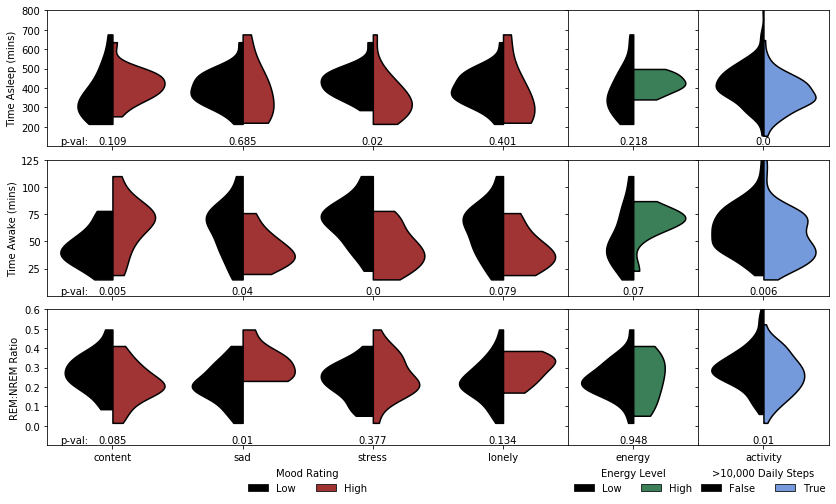

In [58]:
fig, ax = plt.subplots(3,3,figsize=(14,8),sharex='col',sharey='row',gridspec_kw={'width_ratios': [4, 1, 1]})
for sMetric,i in zip(['TotalMinutesAsleep','TotalTimeAwake','REM:NREM'],[0,1,2]):
    inner = None
    sns.violinplot(x='mood',y=sMetric,hue='Score',split=True,inner=inner,cut=0,palette=['black','firebrick'],hue_order=['Low','High'],data=moodAndSleep,ax=ax[i,0])
    sns.violinplot(x='mood',y=sMetric,hue='Score',split=True,inner=inner,cut=0,palette=['black','seagreen'],data=energyOnly,ax=ax[i,1])
    sns.violinplot(x='mood',y=sMetric,hue='>1000 Steps?',split=True,inner=inner,cut=0,palette=['black','cornflowerblue'],data=stepsAndSleep,ax=ax[i,2])
    
for i in range(2):
    for j in range(3):
        ax[i,j].get_legend().remove()
        
ax[2,0].legend(title='Mood Rating',loc='upper center',bbox_to_anchor=(0.5,-0.1),frameon=False,ncol=2)
ax[2,1].legend(title='Energy Level',loc='upper center',bbox_to_anchor=(0.5,-0.1),frameon=False,ncol=2)
ax[2,2].legend(title='>10,000 Daily Steps',loc='upper center',bbox_to_anchor=(0.5,-0.1),frameon=False,ncol=2)
for i in range(3):
    for j in range(3):
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')
        
pvals = True
if pvals:
    count = 0
    round_amt = 3
    lowers = [100,0,-0.1]
    for i in range(3):
        lower = lowers[i]
        ax[i,0].text(-0.4,lower,'p-val:',va='bottom',ha='left')
        for j in range(4):
            ax[i,0].text(j,lower,round(moodStatSummary['p'].to_list()[count],round_amt),ha='center',va='bottom')
            count += 1

    for i in range(3):
        lower = lowers[i]
        ax[i,1].text(0,lower,round(energyStatSummary['p'].to_list()[i],round_amt),ha='center',va='bottom')

    for i in range(3):
        lower = lowers[i]
        ax[i,2].text(0,lower,round(stepStatSummary['p'].to_list()[i],round_amt),ha='center',va='bottom')
    
ax[0,0].set_ylim([100,800])
ax[0,0].set_yticks(np.arange(200,900,100))
ax[0,0].set_ylabel('Time Asleep (mins)')
ax[1,0].set_ylim([0,125])
ax[1,0].set_yticks([25,50,75,100,125])
ax[1,0].set_ylabel('Time Awake (mins)')
ax[2,0].set_ylim([-0.1,0.6])
ax[2,0].set_yticks(np.arange(0,0.7,0.1))
ax[2,0].set_ylabel('REM:NREM Ratio')

plt.subplots_adjust(hspace=0.1,wspace=0)

plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut3000-fitbit-outcomes-violin.png')
plt.show()
plt.close()

In [42]:
moodAndSleep.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,TotalMinutesLight,TotalMinutesDeep,TotalMinutesREM,study,record,...,beacon,TotalMinutesNREM,REM:NREM,content,sad,lonely,stress,energy,Score,mood
2018-10-30,1025,1,293,346,53,203,45,45,ut1000,1025,...,NaN,248,0.181452,2,0,0,3,0,High,content
2018-10-31,1025,1,523,575,52,308,113,102,ut1000,1025,...,NaN,421,0.242280,1,3,0,3,1,Low,content
2018-11-02,1025,1,529,592,63,316,99,114,ut1000,1025,...,NaN,415,0.274699,1,0,0,0,0,Low,content
2018-11-04,1025,1,428,504,76,228,117,83,ut1000,1025,...,NaN,345,0.240580,1,2,2,1,1,Low,content
2018-10-27,1254,2,498,567,62,276,91,32,ut1000,1254,...,NaN,367,0.087193,3,0,0,1,3,High,content


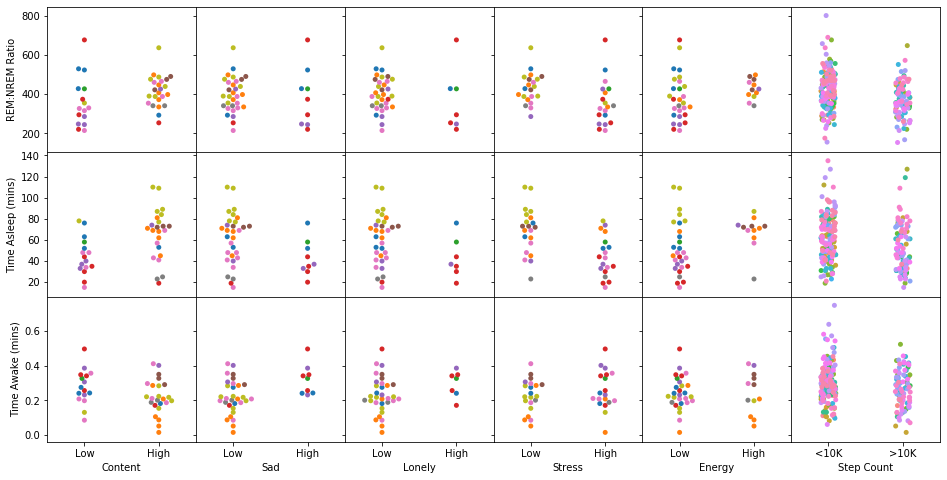

In [82]:
fig, ax = plt.subplots(3,6,figsize=(16,8),sharex='col',sharey='row')#,gridspec_kw={'width_ratios': [4, 1, 2]})
for sMetric,i in zip(['TotalMinutesAsleep','TotalTimeAwake','REM:NREM'],[0,1,2]):
    count = 0
    for mood in ['content','sad','lonely','stress']:
        df = moodAndSleep[moodAndSleep['mood'] == mood]
        sns.swarmplot(x='Score',y=sMetric,hue='beiwe',data=df,order=['Low','High'],ax=ax[i,count])
        ax[i,count].get_legend().remove()
        
        if count == 0:
            if i == 1:
                ax[i,count].set_ylabel('Time Asleep (mins)')
            elif i == 2:
                ax[i,count].set_ylabel('Time Awake (mins)')
            else:
                ax[i,count].set_ylabel('REM:NREM Ratio')
        else:
            ax[i,count].set_ylabel('')
            
        if i == 2:
            ax[i,count].set_xlabel(mood.capitalize())
        else:
            ax[i,count].set_xlabel('')
            
        count += 1
        
    df = energyOnly
    sns.swarmplot(x='Score',y=sMetric,hue='beiwe',data=df,order=['Low','High'],ax=ax[i,4])
    ax[i,4].get_legend().remove()
    ax[i,4].set_ylabel('')
    ax[i,4].set_xlabel('Energy')
    
    df = stepsAndSleep
    df['Step Count'] = np.where(stepsAndSleep['>1000 Steps?'] == True, '>10K','<10K')
    sns.stripplot(x='Step Count',y=sMetric,hue='beiwe',data=df,order=['<10K','>10K'],ax=ax[i,5])
    ax[i,5].get_legend().remove()
    ax[i,5].set_ylabel('')
        
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut3000-fitbit-outcomes-swarm.png')
plt.show()
plt.close()

/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


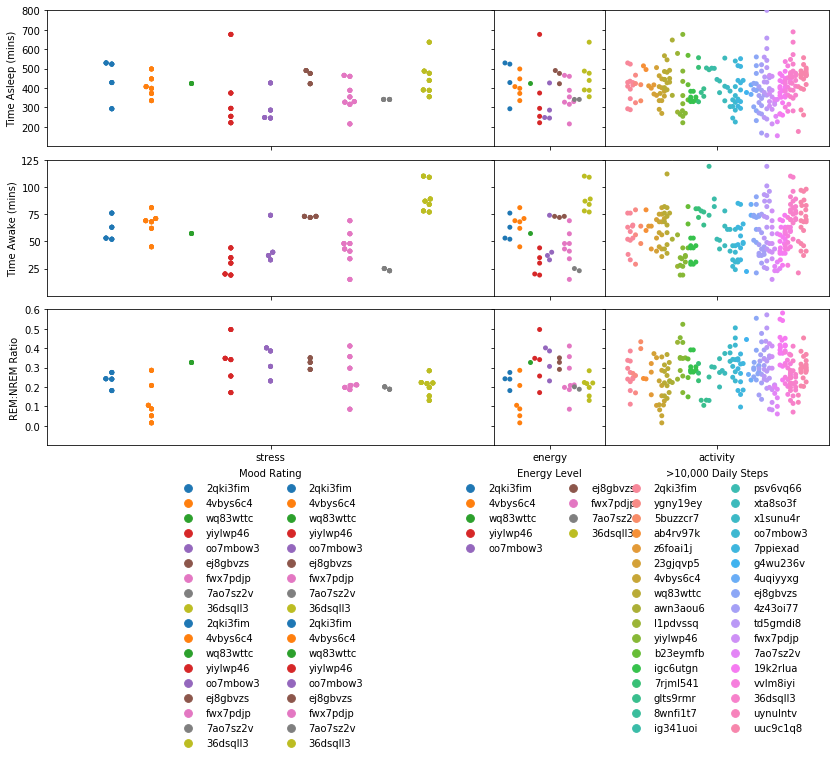

In [43]:
fig, ax = plt.subplots(3,3,figsize=(14,8),sharex='col',sharey='row',gridspec_kw={'width_ratios': [4, 1, 2]})
for sMetric,i in zip(['TotalMinutesAsleep','TotalTimeAwake','REM:NREM'],[0,1,2]):
    inner = None
    for mood in ['content','sad','lonely','stress']:
        df = moodAndSleep[moodAndSleep['mood'] == mood]
        sns.swarmplot(x='mood',y=sMetric,hue='beiwe',split=True,data=df,ax=ax[i,0])
    sns.swarmplot(x='mood',y=sMetric,hue='beiwe',split=True,data=energyOnly,ax=ax[i,1])
    sns.swarmplot(x='mood',y=sMetric,hue='beiwe',split=True,data=stepsAndSleep,ax=ax[i,2])
    
for i in range(2):
    for j in range(3):
        ax[i,j].get_legend().remove()
        
ax[2,0].legend(title='Mood Rating',loc='upper center',bbox_to_anchor=(0.5,-0.1),frameon=False,ncol=2)
ax[2,1].legend(title='Energy Level',loc='upper center',bbox_to_anchor=(0.5,-0.1),frameon=False,ncol=2)
ax[2,2].legend(title='>10,000 Daily Steps',loc='upper center',bbox_to_anchor=(0.5,-0.1),frameon=False,ncol=2)
for i in range(3):
    for j in range(3):
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')
        
ax[0,0].set_ylim([100,800])
ax[0,0].set_yticks(np.arange(200,900,100))
ax[0,0].set_ylabel('Time Asleep (mins)')
ax[1,0].set_ylim([0,125])
ax[1,0].set_yticks([25,50,75,100,125])
ax[1,0].set_ylabel('Time Awake (mins)')
ax[2,0].set_ylim([-0.1,0.6])
ax[2,0].set_yticks(np.arange(0,0.7,0.1))
ax[2,0].set_ylabel('REM:NREM Ratio')

plt.subplots_adjust(hspace=0.1,wspace=0)

#plt.savefig('/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut3000-fitbit-outcomes-violin.png')
plt.show()
plt.close()